# CODE 04: Listing 5.2 Fourier Method - Pag 108

/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0


/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:104: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:108: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:109: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:116: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:117: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0
0


<IPython.core.display.Javascript object>


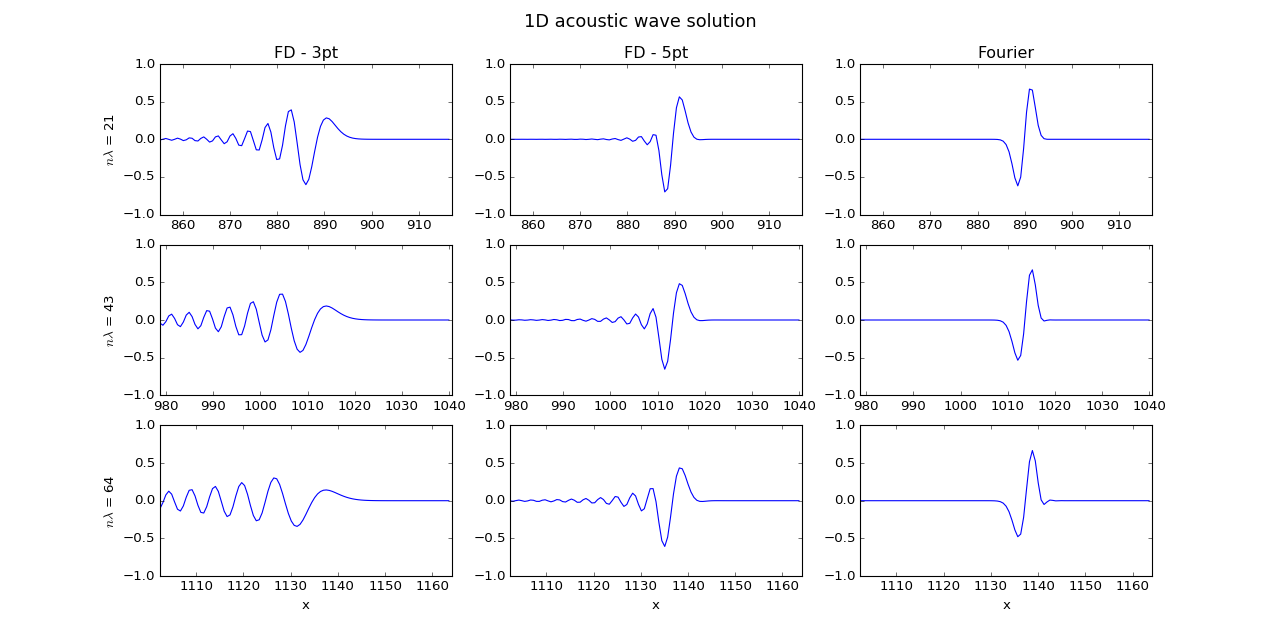

In [1]:
"""
Created on Sat Jan 30 19:53:34 2016
"""
#------------------------------------------------------------------------------
#CHAPTER 5:  The Pseudospectral Method  
#------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from ricker import ricker 

# Show the plots in the Notebook.
plt.switch_backend("nbagg")

#%% CODE 04: Listing 5.2 Fourier Method - Pag 108
# Fourier derivative method   
def fourier_derivative_2nd(f, dx):
    # Length of vector f
    nx = np.size(f)
    # Initialize k vector up to Nyquist wavenumber 
    kmax = np.pi / dx
    dk = kmax / (nx / 2)
    k = np.arange(float(nx))
    k[: nx/2] = k[: nx/2] * dk 
    k[nx/2 :] = k[: nx/2] - kmax
    
    # Fourier derivative
    ff = np.fft.fft(f)
    ff = (1j*k)**2 * ff
    df_num = np.real(np.fft.ifft(ff))
    return df_num
    
# Basic parameters
nt = 3000    # number of time steps
c = 343.     # acoustic velocity
eps = .2     # stability limit
isnap = 1000 # snapshot frequency
isx = 1250   # source location
f0 = 60.     # Frequency (div by 5)
lw = 1.25
ft = 12
fs = ft
iplot = 0

nx = 2024     # number of grid points in x 
p = np.zeros(nx) ; pnew = p ; pold = p ; d2p = p; dp = p   # pressure fields Initialization
ap = np.zeros(nx); apnew = ap; apold = ap; ad2p = ap; adp = ap # initialization of pressure fields
sp = np.zeros(nx); spnew = sp; spold = sp; sd2p = sp; sdp = p # initialization of pressure fields
dx = 1250./(nx-1)  # calculate space increment
x = np.arange(0, nx)*dx   # initialize space coordinates
xmin = min(x)
xmax = max(x)
dt = eps*dx/c; # calculate tim step from stability criterion

# source time function
t = np.arange(1, nt+1)*dt  # initialize time axis
T0 = 1./f0
tmp = ricker(dt, T0)
tmp = np.diff(tmp)
src = np.zeros(nt) 
src[0:np.size(tmp)] = tmp
lam = c*T0

#spatial source function
sigma = 2*dx
x0 = x[isx-1]
sg = np.exp(-1/sigma**2 *(x - x0)**2); sg = sg/np.amax(sg)

plt.figure(figsize=(16,8), dpi=80) 
plt.suptitle("1D acoustic wave solution", fontsize=16)

# Time extrapolation
for it in range(nt):
    # PS            
    sd2p = fourier_derivative_2nd(sp, dx)       # 2nd space derivative     
    spnew = 2*sp - spold + c**2 * dt**2 * sd2p  # Timme Extrapolation   
    spnew = spnew + sg*src[it]*dt**2            # Add sources   
    spold, sp = sp, spnew                       # Time levels
    sp[1] = 0; sp[nx-1] = 0     #set boundaries pressure free
       
    # FD 3pt
    for i in range(1, nx-1):
        d2p[i] = (p[i+1] - 2*p[i] + p[i-1])/dx**2 # Space derivative          
    pnew = 2*p - pold + dt**2 * c**2 * d2p # Extrapolation    
    pnew = pnew + sg*src[it]*dt**2 # Add source    
    pold, p = p, pnew # Time levels
    p[0] = 0; p[nx-1] = 0 # set boundaries pressure free
        
    # FD 5pt
    for i in range(2, nx-2):
        ad2p[i] = (-1/12*ap[i+2] + 4/3*ap[i+1] - 5/2*ap[i] + 4/3*ap[i-1] - 1/12*ap[i-2])/dx**2 # Space derivative        
    apnew = 2*ap - apold + dt**2 * c**2 * ad2p # Extrapolation    
    apnew = apnew + sg*src[it]*dt**2 # Add source    
    apold, ap = ap, apnew # Time levels
    ap[0] = 0; ap[nx-1] = 0 # set boundaries pressure free
                     
    # Plot Wave fields
    if np.mod(it+1, isnap) == 0:
        print(np.mod(it+1, isnap))
        # expected distance
        idist = isx + np.floor(c*dt*it/dx) - 15
        lam = c/f0
        nlam = np.floor(c*dt*it/lam)
        iw = 50 
        amax = 1.5*max(abs(sp[idist-iw:idist+iw]));
               
        iplot += 1
        plt.subplot(3,3,iplot) 
        plt.plot(x[idist-iw:idist+iw], p[idist-iw:idist+iw]/amax)
        plt.axis([x[idist-iw], x[idist+iw], -1, 1])
        plt.ylabel('$n\lambda$ = %d' %nlam)
        if iplot==1: plt.title('FD - 3pt')
        if iplot==7: plt.xlabel('x')       
        
        iplot += 1
        plt.subplot(3,3,iplot)
        plt.plot(x[idist-iw:idist+iw], ap[idist-iw:idist+iw]/amax)
        plt.axis([x[idist-iw], x[idist+iw], -1, 1])
        if iplot==2: plt.title('FD - 5pt')
        if iplot==8: plt.xlabel('x')
        
        iplot += 1
        plt.subplot(3,3,iplot)
        plt.plot(x[idist-iw:idist+iw], sp[idist-iw:idist+iw]/amax)
        plt.axis([x[idist-iw], x[idist+iw], -1, 1])
        if iplot==3: plt.title('Fourier')
        if iplot==9: plt.xlabel('x')       
      
#plt.savefig('Fig_5.10.png')
plt.show()